# TP1 : Distribution du tirage de dés
### Auteur : ARGUELLO Camilo


## Introduction

L'objetfif de ce TP, c'est de faire une expérience simple à fin de se familiariser avec les notions de probabilités et de distributions. Pour cela, nous allons étudier le comportement d'un dé ayant une probabilité uniforme de tomber sur une des six faces. Nous allons étudier la distribution du pipage d'un dé, la distribution de la somme de $N$ dés et la distribution de la fréquence d'apparition d'une valeur pour un tirage de dés. 

Pour les calcules, on va utiliser la librairie `numpy` pour les calcules numériques et `matplotlib` pour les graphiques, ainsi que `random` pour les tirages aléatoires.

In [2]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

## 1. Estimation du pipage d'un dé
### 1.1. Tirage et remplissage de listes

Pour commencer, nous allons effectuer plusieurs lancers d'un dé à six faces pour vérifier s'il est pipé. Nous savons que la moyenne théorique est $$\mu = \frac{1+2+3+4+5+6}{6} = 3.5$$

*Nous garderons trois chiffres significatifs pour nos calculs.*

In [16]:
valeurs = [6, 5, 5, 6, 3, 3, 2, 3, 2, 5, 6, 3, 2, 4, 5, 6, 4, 2, 1, 3, 1, 1, 4, 1, 5, 2, 3, 4, 1, 1, 6, 5, 1, 2, 3, 4, 2, 5, 6, 7]
print("Valeurs obtenues après " + str(len(valeurs)) + " lancers de dés")

# Calcul de la moyenne
def moyenne(valeurs):
    """
    @param {int} valeurs
    """
    moyenne = 0
    for num in valeurs:
        moyenne += num
    return moyenne / len(valeurs)

print("Moyenne: {:.1f}".format(moyenne(valeurs)))

Valeurs obtenues après 40 lancers de dés
Moyenne: 3.5


En faisant la moyenne on voit que la valeur théorique est donc égale à celle trouvée par la méthode des moments. On peut le voir visuellement dans le graphique ci-dessous.

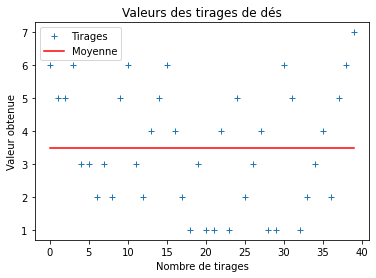

In [15]:
plt.plot(valeurs, '+', label='Tirages')
plt.plot([moyenne(valeurs)] * len(valeurs), 'r', label='Moyenne')
plt.title('Valeurs des tirages de dés')
plt.xlabel('Nombre de tirages')
plt.ylabel('Valeur obtenue')
plt.legend()
plt.show()

On calcule la moyenne sur la somme de chaque paire des valeurs. Par example `6+5`, `5+6`, `3+3`, `2+3`... etc.

Moyenne paire: 7.000


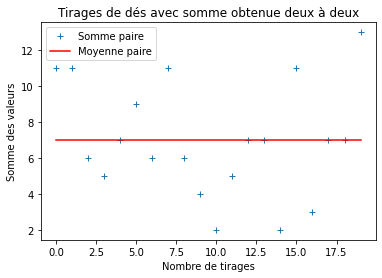

In [17]:
def list_somme_paire(valeurs):
    """
    Calcul de la somme de chaque paire des tirages
    """
    somme = []
    for i in range(0, len(valeurs) - 1, 2):
        somme.append(valeurs[i] + valeurs[i+1])
    return somme
    

def moyenne_paire(valeurs):
    """
    Calcul de la moyenne sur la list_somme_paire
    """
    somme = list_somme_paire(valeurs)
    moyenne = 0
    for num in somme:
        moyenne += num
    return moyenne / len(somme)
    

print("Moyenne paire: {:.3f}".format(moyenne_paire(valeurs)))

plt.plot(list_somme_paire(valeurs), '+', label='Somme paire')
plt.plot([moyenne_paire(valeurs)] * len(list_somme_paire(valeurs)), 'r', label='Moyenne paire')
plt.title('Tirages de dés avec somme obtenue deux à deux')
plt.ylabel('Somme des valeurs')
plt.xlabel('Nombre de tirages')
plt.legend()
plt.show()

La graphique montre que la somme des valeurs moyennes du tirage se situe très proche de la valeur `7`. Pour vérifier cette hypothèse, nous allons définir une distribution du tirage d'un dé à $N$ faces à la fin du TP.

### 1.2. Calcul des probabilités de tirage et création d'histogrammes

Dans le tirage de dés, on calcule la fréquence d'apparition $f_i$ de chaque valeur. Où $f_i$ = rapport entre le nombre de fois où la valeur i est apparue et le nombre total de tirages.

In [5]:
def calcul_frequence (valeurs):
    """
    Calcul de la fréquence d'apparition de chaque valeur
    """
    frequence = []
    for i in range(1, 7):
        # Python List.count() method returns the count of how many times a given object occurs in a List.
        frequence.append(valeurs.count(i) / len(valeurs)) # f_i
    return frequence

print("Fréquence d'apparition: " + str(calcul_frequence(valeurs)))

Fréquence d'apparition: [0.16, 0.16, 0.2, 0.12, 0.2, 0.16]


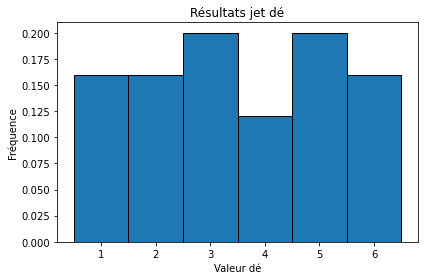

In [6]:
# Création de la figure et des axes
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True) # Ajout de l'histogramme
n_valeurs, _, _ = axs.hist(valeurs, bins=np.arange(0.5, 7.5, 1), ec="black", density=True)
axs.set_title("Résultats jet dé")
axs.set_ylabel("Fréquence")
axs.set_xlabel("Valeur dé")
plt.show()

On fait la verification si les valeurs trouvées dans l'histogramme `n_valeurs` sont les mêmes que celles calculées avec la fonction `calcul_frequence()`

In [7]:
print(calcul_frequence(valeurs) == n_valeurs)

[ True  True  True  True  True  True]


On calcule les écart entre la frequence et la probabilité attendue $p=\frac{1}{6}$

In [8]:
def calcul_ecart_valeurs_frequence(valeurs):
    """
    Calcul de l'écart entre la fréquence et la probabilité attendue
    """
    ecart = []
    p = 1 / 6 # probabilité attendue
    for i in range(6):
        ecart.append(np.abs(calcul_frequence(valeurs)[i] - p))
    return ecart

## On calcule la moyenne des écarts
def moyenne_ecarts_valeurs_frequence(valeurs):
    """
    Calcul de la moyenne des écarts
    """
    ecart = calcul_ecart_valeurs_frequence(valeurs)
    moyenne = 0
    for num in ecart:
        moyenne += num
    return moyenne / len(ecart)

ecarts = [round(num, 3) for num in calcul_ecart_valeurs_frequence(valeurs)]
print("Frequence écart-type", str(ecarts) )
print("Moyenne des écarts: {:.3f}".format(moyenne_ecarts_valeurs_frequence(valeurs)))

Frequence écart-type [0.007, 0.007, 0.033, 0.047, 0.033, 0.007]
Moyenne des écarts: 0.022


Lorsque la probabilité d'obtenir le même résultat pour chaque valeur n'est pas la même, on dit que le dé est pipé.

## 2. Génération de tirage d'un dé

### 2.1. Tirage de dé avec `random`

In [9]:
import random

In [19]:
def create_liste(N):
    """
    Création d'une liste de N valeurs aléatoires entre 0 et 1
    Retourne la liste
    """
    liste = []
    for i in range(0, N):
        liste.append(random.uniform(0, 1))
    return liste

def calcul_frequence_apparition(n, liste):
    """
    Calcul de la fréquence d'apparition de chaque valeur dans une liste
    """
    frequence = []
    for i in range(6):
        frequence.append(n[i] / len(liste))
    return frequence

def calcul_ecart_apparition(valeurs):
    """
    Calcul de l'écart entre la fréquence et la probabilité attendue
    """
    ecart = []
    p = 1 / 6
    for i in range(6):
        ecart.append(np.abs(valeurs[i] - p))
    return ecart

def ecart_moyen_apparition(n, liste):
    """
    Calcul de l'écart moyen avec la fonction \Sigma_i = p \sum_i^6 (f_i - p)^2
    """
    ecart = []
    p = 1 / 6
    for i in range(6):
        ecart.append(np.abs(calcul_frequence_apparition(n, liste)[i] - p))
    return np.sum(ecart)

def histogramme(liste, bins=6, N=1000):
    """
    Affichage de l'histogramme
    Retourne les valeurs de l'histogramme (n), les bornes des bins (bins) et les patches
    """
    # On range les valeurs dans un histogramme à 6 bins
    n, bins, patches = plt.hist(liste, bins=bins, ec="black", density=True)
    plt.title("Fréquence d'apparition des valeurs pour " + str(N) + " de lancers de dés")
    plt.xlabel("Lançage de dés")
    plt.ylabel("Frequence d'apparition")
    plt.show()
    return n, bins, patches

def get_hist_not_graph(liste, bins=6, N=1000):
    """
    Cette fonction permet de récupérer les valeurs de l'histogramme sans afficher le graphique
    Retourne les valeurs de l'histogramme (n), les bornes des bins (bins) et les patches
    """
    # On range les valeurs dans un histogramme à 6 bins
    n, bins, patches = plt.hist(liste, bins=bins, ec="black", density=True)
    # on ne veut pas afficher le graphique
    plt.close()
    return n, bins, patches

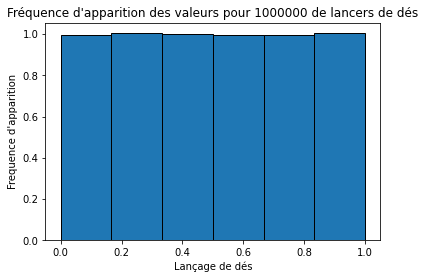

Moyenne de la fréquence: 1.000e-06
Ecart moyen: 1.000


In [20]:
N=int(1e6) # Nombre de lancers de dés
liste = create_liste(N)
n, bins, _ = histogramme(liste, N=N) # On range les valeurs dans un histogramme à 6 bins
frequence = calcul_frequence_apparition(n, liste) # fréquence d'apparition
moyenne_freq = moyenne(frequence) # moyenne de frequence
print("Moyenne de la fréquence: {:.3e}".format(moyenne_freq))
print("Ecart moyen: {:.3f}".format(ecart_moyen_apparition(n, liste)))

La fréquence d'apparition des valeurs est très proche visuellement l'une des autres, mais on peut voir que la fréquence n'est pas égale dans chaque bin.

In [76]:
N=25
liste = create_liste(N)
n, bins, _ = get_hist_not_graph(liste, N=N) # calcul de l'histogramme
frequence = calcul_frequence_apparition(n, liste) # fréquence d'apparition
moyenne_freq = moyenne(frequence) # moyenne de frequence
print("Moyenne de la fréquence: {:.3e}".format(moyenne_freq))
print("Ecart moyen: {:.3f}".format(ecart_moyen_apparition(n, liste)))

Moyenne de la fréquence: 4.609e-02
Ecart moyen: 0.723


In [77]:
N=50
liste = create_liste(N)
n, bins, _ = get_hist_not_graph(liste, N=N) # calcul de l'histogramme 
frequence = calcul_frequence_apparition(n, liste) # fréquence d'apparition
moyenne_freq = moyenne(frequence) # moyenne de frequence
print("Moyenne de la fréquence: {:.3e}".format(moyenne_freq))
print("Ecart moyen: {:.3f}".format(ecart_moyen_apparition(n, liste)))

Moyenne de la fréquence: 2.059e-02
Ecart moyen: 0.876


In [78]:
N=100
liste = create_liste(N)
n, bins, _ = get_hist_not_graph(liste, N=N) # calcul de l'histogramme 
frequence = calcul_frequence_apparition(n, liste) # fréquence d'apparition
moyenne_freq = moyenne(frequence) # moyenne de frequence
print("Moyenne de la fréquence: {:.3e}".format(moyenne_freq))
print("Ecart moyen: {:.3f}".format(ecart_moyen_apparition(n, liste)))

Moyenne de la fréquence: 1.019e-02
Ecart moyen: 0.939


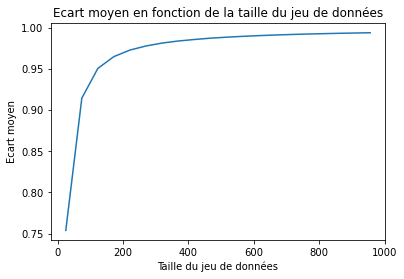

In [85]:
# Avec N from 25 to 1000000 avec steps (deux fois plus)
# On calcule l'écart moyen et sa variation
def ecart_moyen_variation(N):
    """
    Calcul de l'écart moyen et sa variation
    """
    liste = create_liste(N)
    n, bins, _ = get_hist_not_graph(liste)
    return ecart_moyen_apparition(n, liste)

end=1000
start=25
step=20
interval = end - start                     # Intervalle
num_points = int(interval / step) + 1      # Nombre d'éléments
N = np.arange(start, end, num_points)

ecart_moyen = []
for i in N:
    ecart_moyen.append(ecart_moyen_variation(i))

plt.plot(N, ecart_moyen)
plt.title("Ecart moyen en fonction de la taille du jeu de données")
plt.xlabel("Taille du jeu de données")
plt.ylabel("Ecart moyen")
plt.show()    

D'après le graphique, on voit que l'ecart moyen tend vers `1` lorsqu'on augmente le nombre de tirages. Ce qui signifie que les fréquences d'apparition pour chaque valeur devraient se rapprocher de leur valeur attendue de manière plus précise. Cela explique pourquoi la fréquence d'apparition des valeurs est plus proche les unes des autres lorsque le nombre de tirages est plus grand.

### 2.2. Distribution de sommes de dés

Maintenant, on va étudier la distribution de la somme des valeurs obtenues lors du tirage de deux dés à $N$ faces.

In [141]:
def calcul_yi(x, n):
    """
    Calcul de y_i = \sum_{j=i*n}^{(i+1)*n-1} x_i
    Exemple: Pour une liste x = [1, 1, 2, 3, 4, 1, 1, 1], n=2
    On fait :   y_0 = x_0 + x_1 = 1 + 1 = 2
                y_1 = x_2 + x_3 = 2 + 3 = 5
                y_2 = x_4 + x_5 = 4 + 1 = 5
                y_3 = x_6 + x_7 = 1 + 1 = 3
    Pour n=3, on peut faire la somme:
                y_0 = x_0 + x_1 + x_2 = 1 + 1 + 2 = 4
                y_1 = x_3 + x_4 + x_5 = 3 + 4 + 1 = 8
                ...
    On obtient pour n=2 : y = [2, 5, 5, 3]
    Retourne une liste de y_i
    """
    y = []
    for i in range(0, len(x), n):
        y.append(np.sum(x[i:i+n]))
    return y 

def frequence_apparition_dans_y_i(y):
    """
    On calcule la fréquence d'apparition de chaque valeur dans y_i, c'est à dire le nombre de fois qu'une valeur est répétée dans y_i
    Exemple: y = [2, 5, 5, 3]
    On a:    y_0 = 2, y_1 = 5, y_2 = 5, y_3 = 3
    Alors, on retourne une liste de la même taille que y, mais avec les valeurs de fréquence d'apparition
    On obtient: [1, 2, 2, 1]
    Retourne une liste de fréquence d'apparition
    """
    sommes = []
    for i in range(len(y)):
        sommes.append(y.count(y[i]))
    return sommes

def reshape_yi(listA,listB):
    """
    Cette fonction permets de combiner deux listes, quand la valeur de listA est répétée, on garde juste une valeur.
    L'objective c'est de avoir deux listes de même taille, mais avec des valeurs de y_i et la fréquence d'apparition.

    Exemple: listA = [2, 2, 4, 4, 6, 6, 8, 9, 11, 12] et listB=[2, 2, 2, 2, 2, 2, 1, 1, 1, 1]. 
    # Où, listA contient les valeurs de y_i et listB contient les valeurs de fréquence d'apparition
    On obtient: listC = [2, 4, 6, 8, 9, 11, 12] et listD = [2, 2, 2, 1, 1, 1, 1]
    # Où, listC contient les valeurs uniques de y_i et listD contient les valeurs uniques de fréquence d'apparition

    Retourne deux listes
    """
    # to combine two list, when the value of listA is repeated, we just keep one value
    listC = list(set(listA) | set(listB))
    # remove the value of listC that are not in listA
    listC = [i for i in listC if i in listA]
    # get the index of the value in listA
    listD = [listA.index(i) for i in listC]
    # get the value of listB
    listE = [listB[i] for i in listD]
    return listC, listE


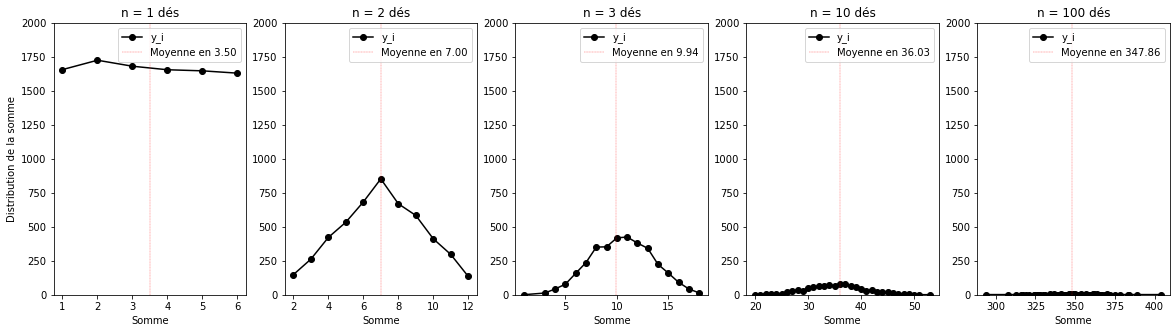

In [145]:
N=10000
valeurs_n = [1, 2, 3, 10, 100]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 5))
axes = [ax1, ax2, ax3, ax4, ax5]
axes[0].set_ylabel("Distribution de la somme")

for i in range(len(valeurs_n)):
    n = valeurs_n[i]                                            # nombre de dés
    x = np.random.randint(1, 7, N)                              # tirage aléatoire de N valeurs entre 1 et 6
    y = calcul_yi(x, n)                                         # calcul de y_i
    frequence = frequence_apparition_dans_y_i(y)                # calcul de la fréquence d'apparition de chaque valeur dans y_i
    X,Y = reshape_yi(y,frequence)                               # on obtient les valeurs uniques de X et Y
    axes[i].plot(X,Y,"o-", color="black", label="y_i")          # distribution
    axes[i].axvline(x=np.mean(X), color="red", label="Moyenne en {:.2f}".format(np.mean(X)) , linestyle="--", linewidth=.3) # moyenne droite
    axes[i].set_title("n = {} dés".format(n))
    axes[i].set_xlabel("Somme")
    axes[i].set_ylim(0, 2000)
    axes[i].legend()


On voit que si on jette par exemple $n=2$ dés à 6 faces, et qu'on additionne les nombres obtenus sur les deux faces supérieures, les tirages suivent une distribution de forme triangulaire. Dont la valeur le plus fréquente est `7` car les combinatios `1+6`, `2+5`, `3+4`, `4+3`, `5+2`, `6+1` sont les plus fréquentes. Cependant pour obtenir `4` ou `10` on doit faire un tirage de `1+3` ou `3+1` et `2+2` qui sont moins fréquentes.

Lorsqu'on a plus des dés, la distribution de la somme des valeurs obtenues lors du tirage de deux dés à $6$ faces devient une distribution normale. C'est le cas de la distribution lorsque $n=100$ dont sa valeur plus fréquente est d'environ `350`.